# Prediction of Key Variables in Wastewater Treatment Plants Using Machine Learning Models

## Notebook developed for WCCI paper case study: <p style="color:blue">Nitrate ($NO_3$).</p>

## Data Source: Benchmark Simulation Model No 2 - BSM2

As the objective is to predict the value of NO3 at the exit of the aerobic tank, data will be collected between units (tanks) 2 and 3, and at the exit of tank 5.

<img src="figuras/f4.png" width="500">

## Initial Exploratory Data Analysis

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load datasets
df_entrada = pd.read_csv('datasets/dado5.csv')
df_saida = pd.read_csv('datasets/dado8.csv')

In [4]:
# Copy the S_NO column from the df_saida table to a target column, and add it to the df_entry table
df_entrada['S_NO_target'] = df_saida['S_NO']

In [5]:
# Delete 5 dummy variables
df_entrada.drop(["d1", "d2","d3","dp1","dp2"], axis = 1, inplace = True)

In [6]:
# Dataset
df_entrada.head()

time        S_I       S_S          X_I        X_S        X_b,h  \
0  0.010417  28.067023  1.268253  1544.857445  57.810141  2263.844807   
1  0.020833  28.080713  1.213295  1566.626941  56.250462  2295.567404   
2  0.031250  28.104926  1.166586  1586.173348  54.871248  2323.879898   
3  0.041667  28.134986  1.128876  1601.166411  53.689564  2345.443738   
4  0.052083  28.166516  1.097790  1612.142341  52.625194  2361.084431   

        X_b,a          X_p       S_0      S_NO      S_NH      S_ND      X_ND  \
0  167.962940   973.899308  0.000169  2.265460  6.981219  0.657996  3.703355   
1  170.409281   988.097528  0.000152  2.451755  6.553976  0.635936  3.633024   
2  172.609877  1000.886581  0.000157  2.658756  6.135189  0.620582  3.559093   
3  174.303302  1010.758250  0.000158  2.853949  5.767598  0.607559  3.488304   
4  175.548443  1018.058063  0.000151  3.028143  5.448274  0.595661  3.422094   

      S_alk          TSS            fr       temp  S_NO_target  
0  5.546914  3756.280981  97627.650656  14.858490     9.220979  
1  5.503489  3807.713712  97056.068164  14.860318     9.276799  
2  5.459704  3853.815714  96395.567674  14.863169     9.310110  
3  5.420912  3889.020948  95747.265846  14.866241     9.332799  
4  5.387443  3914.593854  95149.331497  14.868961     9.331921

In [8]:
# Data types
df_entrada.dtypes 

time           float64
S_I            float64
S_S            float64
X_I            float64
X_S            float64
X_b,h          float64
X_b,a          float64
X_p            float64
S_0            float64
S_NO           float64
S_NH           float64
S_ND           float64
X_ND           float64
S_alk          float64
TSS            float64
fr             float64
temp           float64
S_NO_target    float64
dtype: object

## Statistics

In [9]:
# Dataset statistics
df_entrada.describe()

time           S_I           S_S           X_I           X_S  \
count  58464.000000  58464.000000  58464.000000  58464.000000  58464.000000   
mean     304.505208     28.580862      1.430209   1336.534122     58.173346   
std      175.804660      3.773040      0.562712    220.730613     15.174073   
min        0.010417      8.142678      0.655557    840.901424     22.294508   
25%      152.257813     27.893136      1.044180   1118.804467     45.085363   
50%      304.505208     29.533444      1.356410   1394.164563     57.950717   
75%      456.752604     30.866061      1.674283   1526.336452     69.538110   
max      609.000000     34.730168     12.084407   1737.648859    121.382643   

              X_b,h         X_b,a           X_p           S_0          S_NO  \
count  58464.000000  58464.000000  58464.000000  58464.000000  58464.000000   
mean    2276.770259    157.503937    763.765201      0.000155      3.835564   
std      534.759026     34.576068    103.798696      0.000052      1.809766   
min     1038.138895     84.005438    468.995503      0.000034      0.026893   
25%     1774.792651    123.561272    676.816503      0.000124      2.509902   
50%     2399.695561    165.904618    758.010677      0.000149      3.806137   
75%     2738.426546    187.628681    839.129312      0.000183      5.098299   
max     3284.779705    216.997187   1057.898134      0.000508     10.334202   

               S_NH          S_ND          X_ND         S_alk           TSS  \
count  58464.000000  58464.000000  58464.000000  58464.000000  58464.000000   
mean       7.276064      0.707228      3.653783      5.431105   3444.560149   
std        3.065072      0.182162      0.807898      0.386091    646.844461   
min        1.748111      0.365029      1.606169      4.462790   1974.392952   
25%        4.798353      0.570628      3.031884      5.156016   2801.033183   
50%        6.944790      0.687648      3.593284      5.386066   3635.833793   
75%        9.223233      0.822194      4.170087      5.655404   4007.585627   
max       17.590980      1.800423      7.259230      6.945568   4597.148517   

                  fr          temp   S_NO_target  
count   58464.000000  58464.000000  58464.000000  
mean   103942.233911     14.333348     10.969581  
std      8546.134167      3.402605      2.133399  
min     88188.428439      9.735365      4.245032  
25%     97705.612007     11.065225      9.528749  
50%    102748.865558     13.765047     11.045901  
75%    108449.683146     17.601160     12.454417  
max    143018.234927     20.173931     17.681210

### Correlations

Text(0.5, 1.0, 'Correlation Heatmap - Nitrate and Nitrite')

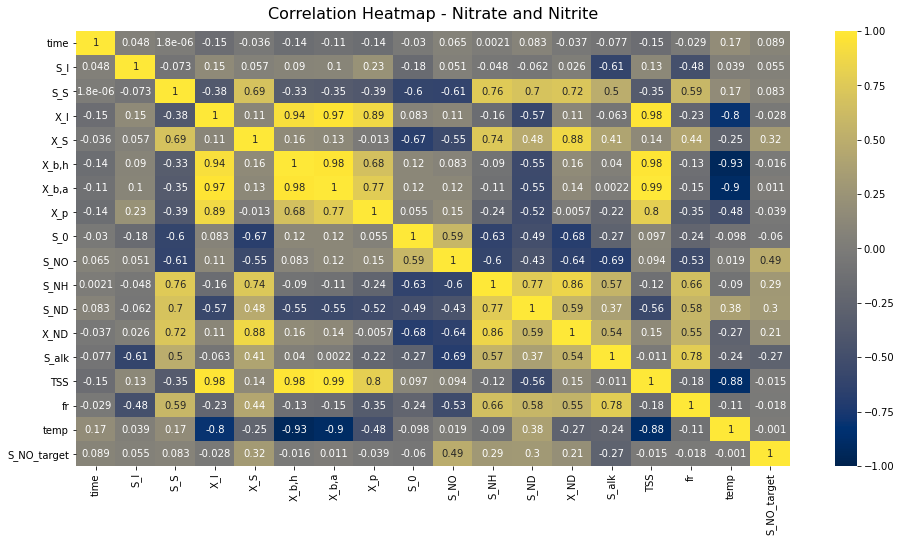

In [12]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df_entrada.corr(), annot=True,vmin=-1, vmax=1,center= 0, cmap='cividis')
heatmap.set_title('Correlation Heatmap - Nitrate and Nitrite', fontdict={'fontsize':16}, pad=12)

Os modelos serão feito com as maiores correlações: X_S; S_NO; S_NH; S_ND; X_ND; S_alk

## Prepare the data

### Split data into training and testing sets
<img src="figuras/f3.png" width="500">

In [13]:
df_treino = df_entrada[0:17280] # 180 days for training and testing
df_teste_final = df_entrada[34936:36001] # 10 days (holdout sample) for final test

In [14]:
# Adjust graph size
sns.set(rc={'figure.figsize':(15,8)})

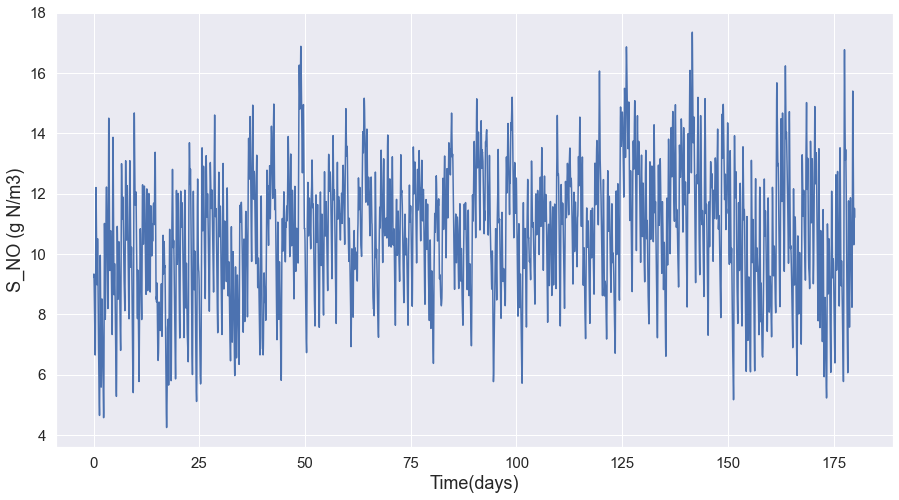

In [15]:
# 180 days for training and testing
p = sns.lineplot(x="time", y="S_NO_target", data=df_treino)
p.set_xlabel("Time(days)", fontsize = 18)
p.set_ylabel("S_NO (g N/m3)", fontsize = 18)
p.tick_params(labelsize=15)

(array([ 4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

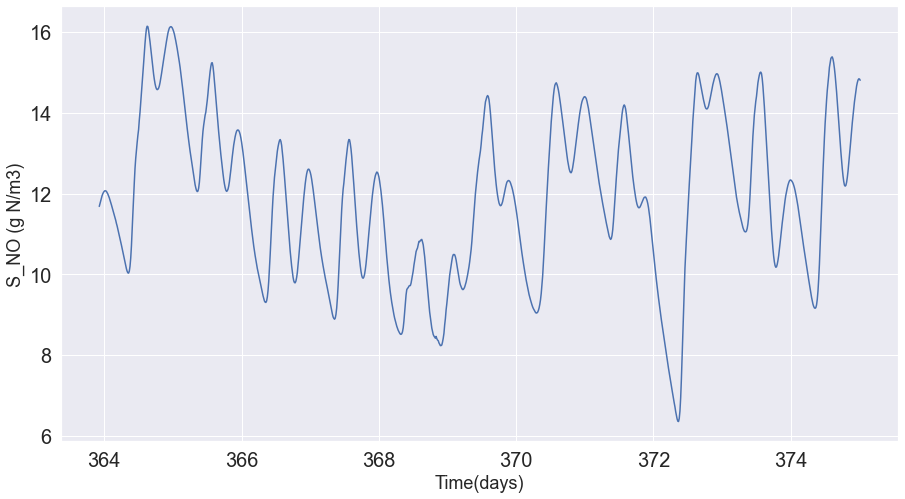

In [16]:
# 10 days for final evaluation
p = sns.lineplot(x="time", y="S_NO_target", data=df_teste_final)
p.set_xlabel("Time(days)", fontsize = 18)
p.set_ylabel("S_NO (g N/m3)", fontsize = 18)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('tss_final2.pdf', dpi=500, format='pdf', bbox_inches='tight') 

In [17]:
# Copy dataset
df = df_treino.copy()

## Algorithms

### Algorithm 1: Long short-term memory (LSTM)

#### Preparing data for the algorithm

In [18]:
df_for_training = df.filter(['S_NO_target','X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)

In [19]:
# Dataset to be used
df_for_training.head()

S_NO_target        X_S      S_NO      S_NH      S_ND      X_ND     S_alk
0     9.220979  57.810141  2.265460  6.981219  0.657996  3.703355  5.546914
1     9.276799  56.250462  2.451755  6.553976  0.635936  3.633024  5.503489
2     9.310110  54.871248  2.658756  6.135189  0.620582  3.559093  5.459704
3     9.332799  53.689564  2.853949  5.767598  0.607559  3.488304  5.420912
4     9.331921  52.625194  3.028143  5.448274  0.595661  3.422094  5.387443

In [20]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [21]:
# Put the data in the format for the LSTM
trainX = []
trainY = []

n_future = 1   # Number of samples to be predicted in the future
n_past = 96  # Number of samples to consider to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (17184, 96, 7).
trainY shape == (17184, 1).


#### Creating the model

In [23]:
# Create the LSTM model with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
import tensorflow as tf

In [24]:
def get_model():
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(32, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer='adam', loss='mse')
    return model

modelo = get_model()

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 96, 64)            18432     
_________________________________________________________________
lstm_1 (LSTM)                (None, 96, 32)            12416     
_________________________________________________________________
dropout (Dropout)            (None, 96, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 39,201
Trainable params: 39,201
Non-trainable params: 0
____________________________________________________

#### Training

In [22]:
# Training the model
# modelo.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

In [23]:
# Save trained model
# modelo.save('modelo_1_lstm.h5')

In [25]:
# Load the model
loaded_model = load_model("modelos/modelo_1_lstm.h5")

#### Prepare test data and predictions

In [26]:
# Data for final test
teste_final = df_teste_final.filter(['S_NO_target','X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)

In [27]:
# Normalize
scaler = StandardScaler()
scaler = scaler.fit(teste_final)
teste_final_scaled = scaler.transform(teste_final)

In [28]:
# Put the data in the format for the LSTM
train_finalX = []
train_finalY = []

n_future = 1   # Number of samples to be predicted in the future
n_past = 96  # Number of samples to consider to predict the future

for i in range(n_past, len(teste_final_scaled) - n_future +1):
    train_finalX.append(teste_final_scaled[i - n_past:i, 0:df_teste_final.shape[1]])
    train_finalY.append(teste_final_scaled[i + n_future - 1:i + n_future, 0])

train_finalX, train_finalY = np.array(train_finalX), np.array(train_finalY)

print('train_finalX shape == {}.'.format(train_finalX.shape))
print('train_finalY shape == {}.'.format(train_finalY.shape))

train_finalX shape == (969, 96, 7).
train_finalY shape == (969, 1).


#### Results

In [29]:
# Forecasts
previsao = loaded_model.predict(train_finalX)

In [30]:
# Copy scaler dimension to do inverse normalization
prediction_copies = np.repeat(previsao, df_for_training.shape[1], axis=-1)
previsto_LSTM = scaler.inverse_transform(prediction_copies)[:,0] # Predicted value

In [31]:
real_copies = np.repeat(train_finalY, df_for_training.shape[1], axis=-1)
real = scaler.inverse_transform(real_copies)[:,0]

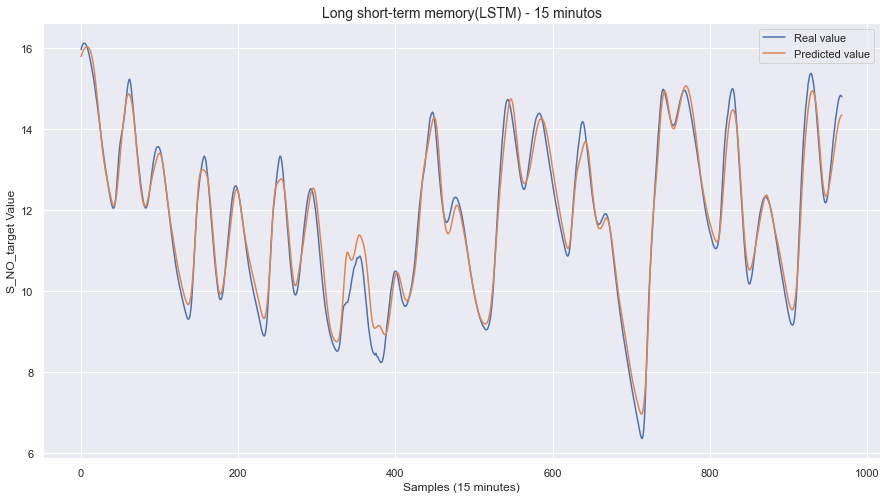

In [34]:
# Graph: actual value and predicted value
plt.figure(figsize = (15, 8))
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM) - 15 minutes', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('S_NO_target Value')
plt.legend(['Real value', 'Predicted value'], loc='upper right')

In [33]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse1 = rmse(real, previsto_LSTM).numpy() 
print(rmse1)

mse = tf.keras.losses.MeanSquaredError()
mse1 = mse(real, previsto_LSTM).numpy()
print(mse1)

mae = tf.keras.losses.MeanAbsoluteError()
mae1 = mae(real, previsto_LSTM).numpy()
print(mae1)

mape = tf.keras.losses.MeanAbsolutePercentageError()
mape1 = mape(real, previsto_LSTM).numpy() 
print(mape1)

0.31995374
0.10237039
0.24943416
2.246834


### Algorithm 2: Artificial Neural Network (ANN)

#### ANN 1

In [35]:
# Keras specific packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf # Para métricas de avaliação do modelo

In [36]:
# Create independent(x) and dependent(y) variable columns
df_for_training = df.filter(['S_NO_target','X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)
df_ann_x = df_for_training.filter(['X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)
df_ann_y = df_for_training.filter(['S_NO_target'], axis=1)

In [37]:
df_ann_x.head()

X_S      S_NO      S_NH      S_ND      X_ND     S_alk
0  57.810141  2.265460  6.981219  0.657996  3.703355  5.546914
1  56.250462  2.451755  6.553976  0.635936  3.633024  5.503489
2  54.871248  2.658756  6.135189  0.620582  3.559093  5.459704
3  53.689564  2.853949  5.767598  0.607559  3.488304  5.420912
4  52.625194  3.028143  5.448274  0.595661  3.422094  5.387443

In [38]:
df_ann_y.head()

S_NO_target
0     9.220979
1     9.276799
2     9.310110
3     9.332799
4     9.331921

In [39]:
# Normalize the data
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(df_ann_x)
output_scaler = scaler_y.fit(df_ann_y)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(df_ann_y)
train_x_norm = input_scaler.transform(df_ann_x)

In [40]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, train_y_norm, test_size=0.30, random_state=40)
print(f'Training set : x:{X_train.shape}, y:{y_train.shape}')
print(f'test set: x:{X_test.shape}, y:{y_test.shape}')

Conjuntos de treino: x:(12096, 6), y:(12096, 1)
Conjuntos de teste: x:(5184, 6), y:(5184, 1)


#### Preparing the model

In [41]:
# Defining model
model = Sequential()
model.add(Dense(500, input_dim=df_ann_x.shape[1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               3500      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 73,901
Trainable params: 73,901
Non-trainable params: 0
_________________________________________________________________


#### Training

In [39]:
# Compile the model
#model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
#model_ann = model.fit(X_train, y_train, epochs=20)

In [40]:
# #plot the loss and validation loss of the dataset
# history_df = pd.DataFrame(model_ann.history)
# plt.plot(history_df['loss'], label='loss')
# plt.plot(history_df['mae'], label='mae')
# plt.legend()

In [41]:
# Save trained model
#model.save('model_ann2.h5')

In [42]:
# Load the model
model_ann = load_model("modelos/model_ann.h5")

#### Preparing test data for predictions

In [43]:
# Process test data 
# Create independent(x) and dependent(y) variable columns
df_teste_final = df_entrada[35041:36001] # 10 days (holdout sample) for the final test.

df_final_x = df_teste_final.filter(['X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)
df_final_y = df_teste_final.filter(['S_NO_target'], axis=1)

In [44]:
print(df_final_x.shape)
print(df_final_y.shape)

(960, 6)
(960, 1)


In [45]:
# Normalizing data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)

#### Results

In [46]:
# Make prediction with trained model
previsao_ann = model_ann.predict(final_x_norm)

In [47]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_ann)

In [48]:
# Create dataframe with real and forecast values
df2 = df_final_y.reset_index()

In [49]:
column_names = ["real", "previsto"]
df3 = pd.DataFrame(columns = column_names)

In [50]:
df3['real'] = df2['S_NO_target'] 
df3['previsto'] = y_previsto 

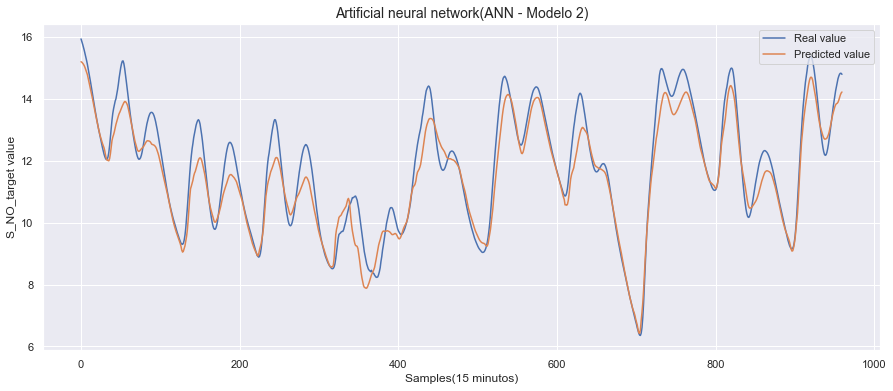

In [51]:
# NO3 graph
plt.figure(figsize = (15, 6))
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network(ANN - Model 2)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('S_NO_target value')
plt.legend(['Real value', 'Predicted value'], loc='upper right')

In [52]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df3.real, df3.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df3.real, df3.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df3.real, df3.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df3.real, df3.previsto).numpy())

RMSE: 0.58221483
MSE: 0.33897412
MAE: 0.43926528
MAPE: 3.6156163


#### ANN 2

#### Preparing data for the algorithm

In [53]:
# Set model
model = Sequential()
model.add(Dense(500, input_dim=df_ann_x.shape[1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               3500      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 63,801
Trainable params: 63,801
Non-trainable params: 0
_________________________________________________________________


#### Training

In [53]:
# Compile the model
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
# model_ann = model.fit(X_train, y_train, epochs=20)

In [55]:
# Saving the trained model 
#model.save('modelos/model_ann_2.h5')

In [54]:
# Load the model
model_ann = load_model("modelos/model_ann_2.h5")

#### Prepare test data for predictions

In [55]:
# Create independent(x) and dependent(y) variable columns
df_teste_final = df_entrada[35041:36001] # 10 dias(holdout sample) for the final test
df_final_x = df_teste_final.filter(['X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)
df_final_y = df_teste_final.filter(['S_NO_target'], axis=1)

In [56]:
print(df_final_x.shape)
print(df_final_y.shape)

(960, 6)
(960, 1)


In [57]:
# Normalize data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)

#### Results

In [58]:
# Make prediction with trained model
previsao_ann = model_ann.predict(final_x_norm)

In [59]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_ann)

In [60]:
# Create dataframe with actual and forecast values
df2 = df_final_y.reset_index()

In [61]:
column_names = ["real", "previsto"]
df3 = pd.DataFrame(columns = column_names)

In [62]:
df3['real'] = df2['S_NO_target'] 
df3['previsto'] = y_previsto 

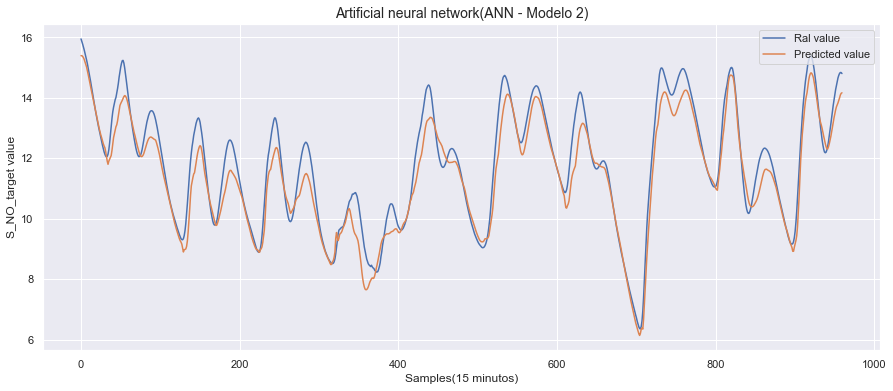

In [63]:
# NO3 Graph
plt.figure(figsize = (15, 6))
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network(ANN - Model 2)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('S_NO_target value')
plt.legend(['Ral value', 'Predicted value'], loc='upper right')

In [64]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df3.real, df3.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df3.real, df3.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df3.real, df3.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df3.real, df3.previsto).numpy())

RMSE: 0.5998059
MSE: 0.35976714
MAE: 0.4569982
MAPE: 3.7878633


### Algorithm 3: Adaptive neuro-fuzzy inference system (ANFIS)
The model was developed in Matlab.

<img src="figuras/f7.png"> 

In [65]:
df_entrada.head()

time        S_I       S_S          X_I        X_S        X_b,h  \
0  0.010417  28.067023  1.268253  1544.857445  57.810141  2263.844807   
1  0.020833  28.080713  1.213295  1566.626941  56.250462  2295.567404   
2  0.031250  28.104926  1.166586  1586.173348  54.871248  2323.879898   
3  0.041667  28.134986  1.128876  1601.166411  53.689564  2345.443738   
4  0.052083  28.166516  1.097790  1612.142341  52.625194  2361.084431   

        X_b,a          X_p       S_0      S_NO      S_NH      S_ND      X_ND  \
0  167.962940   973.899308  0.000169  2.265460  6.981219  0.657996  3.703355   
1  170.409281   988.097528  0.000152  2.451755  6.553976  0.635936  3.633024   
2  172.609877  1000.886581  0.000157  2.658756  6.135189  0.620582  3.559093   
3  174.303302  1010.758250  0.000158  2.853949  5.767598  0.607559  3.488304   
4  175.548443  1018.058063  0.000151  3.028143  5.448274  0.595661  3.422094   

      S_alk          TSS            fr       temp  S_NO_target  
0  5.546914  3756.280981  97627.650656  14.858490     9.220979  
1  5.503489  3807.713712  97056.068164  14.860318     9.276799  
2  5.459704  3853.815714  96395.567674  14.863169     9.310110  
3  5.420912  3889.020948  95747.265846  14.866241     9.332799  
4  5.387443  3914.593854  95149.331497  14.868961     9.331921

In [66]:
df_entrada.shape

(58464, 18)

In [67]:
df_treino = df_entrada[0:17280] # 180 days for training and testing
df_teste = df_entrada[34936:36001] # 10 days (holdout sample) for final test

In [68]:
# New dataset with selected features
data_treino = df_treino[['S_NO', 'S_NH', 'S_ND', 'X_ND', 'S_alk', 'S_NO_target']]
data_teste = df_teste[['S_NO', 'S_NH', 'S_ND', 'X_ND', 'S_alk', 'S_NO_target']]

In [69]:
print('Treino:',data_treino.shape)
print('Teste:',data_teste.shape)

Treino: (17280, 6)
Teste: (1065, 6)


In [73]:
# Export datasets in excel - the model will be made in matlab
# data_treino.to_excel(r'data_treino.xlsx', index = False)
# data_teste.to_excel(r'data_teste.xlsx', index = False)

In [70]:
# Read excel with results 
dataAnfis = pd.ExcelFile('datasets/data_anfis_N03.xlsx')

In [71]:
# Worksheet names 
dataAnfis.sheet_names

['treino', 'teste', 'teste_final', 'resultado']

In [72]:
# Dataset with results
df_anfis = pd.read_excel(dataAnfis, 'resultado')

In [73]:
df_anfis.head()

NO_real  NO_previsto
0  11.682409    11.685207
1  11.751957    11.698847
2  11.820260    11.758247
3  11.891223    11.863429
4  11.951053    12.007412

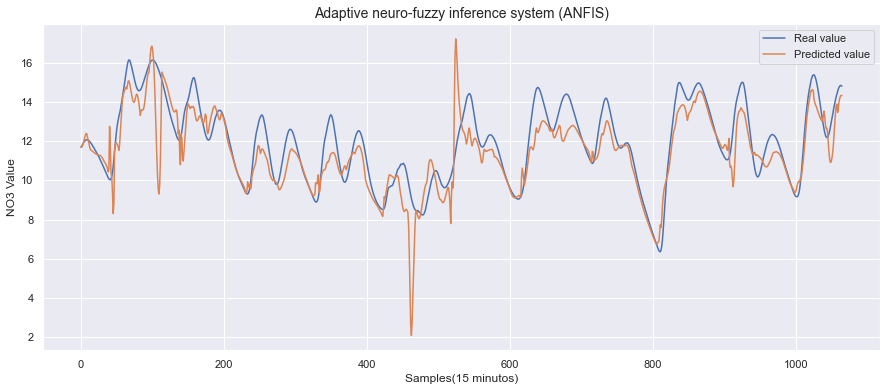

In [74]:
# NO3 Graph
plt.figure(figsize = (15, 6))
plt.plot(df_anfis.NO_real)
plt.plot(df_anfis.NO_previsto)
plt.title('Adaptive neuro-fuzzy inference system (ANFIS)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutes)')
plt.ylabel('NO3 Value') 
plt.legend(['Real value', 'Predicted value'], loc='upper right')

plt.show()

In [75]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df_anfis.NO_real, df_anfis.NO_previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df_anfis.NO_real, df_anfis.NO_previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df_anfis.NO_real, df_anfis.NO_previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df_anfis.NO_real, df_anfis.NO_previsto).numpy())

RMSE: 1.140534
MSE: 1.3008180856704712
MAE: 0.7858242392539978
MAPE: 6.4833197593688965


### Algorithm 4: Gaussian Mixture Regression

#### Prepare data for the algorithm

In [76]:
df_treino = df_treino[['S_NO_target','X_S','S_NO','S_NH','S_ND','X_ND','S_alk']]
df_teste_final = df_teste_final[['S_NO_target','X_S','S_NO','S_NH','S_ND','X_ND','S_alk']]

In [77]:
df_for_training = df_treino.filter(['S_NO_target','X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)

In [78]:
# Create columns of independent (x) and dependent (y) variables
df_gmr_x = df_for_training.filter(['X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)
df_gmr_y = df_for_training.filter(['S_NO_target'], axis=1)

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Normalize os dados
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(df_gmr_x)
output_scaler = scaler_y.fit(df_gmr_y)
# Apply the scaler to training data
train_x_norm = input_scaler.transform(df_gmr_x)
train_y_norm = output_scaler.transform(df_gmr_y)

In [80]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, train_y_norm, test_size=0.30, random_state=40)
print(f'Training set: x:{X_train.shape}, y:{y_train.shape}')
print(f'Test set: x:{X_test.shape}, y:{y_test.shape}')

Conjuntos de treino: x:(12096, 6), y:(12096, 1)
Conjuntos de teste: x:(5184, 6), y:(5184, 1)


#### Preparing the model

In [ ]:
#!pip install gmr

In [ ]:
from gmr.sklearn import GaussianMixtureRegressor
from matplotlib import pyplot
from sklearn.metrics import r2_score

In [ ]:
import time
from sklearn.model_selection import GridSearchCV,learning_curve

In [ ]:
model = GridSearchCV(
    GaussianMixtureRegressor(n_components=2),param_grid={"n_components": [2,3,4,5,10,15,20,25,30]},
)

#### Training

In [ ]:
t0 = time.time()
gmr = model.fit(X_train,y_train) # Scaled X_train and y_train
model_fit = time.time() - t0
print("GMR complexity and bandwidth selected and model fitted in %.3f s" % model_fit)

In [ ]:
# Search results for better parameters
gmr.cv_results_

In [ ]:
# Best parameters
gmr.best_estimator_

#### Preparing test data for predictions

In [ ]:
# Create columns of independent (x) and dependent (y) variables
df_final_x = df_teste_final.filter(['X_S','S_NO','S_NH','S_ND','X_ND','S_alk'], axis=1)
df_final_y = df_teste_final.filter(['S_NO_target'], axis=1)

In [ ]:
print(df_final_x.shape)
print(df_final_y.shape)

In [ ]:
# Normalize data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)
final_y_norm = output_scaler.transform(df_final_y)

In [ ]:
# Test with the best parameter. It is the same as gmr.best_estimator_.predict(final_x_norm)
y_pred = gmr.predict(final_x_norm) 
y_pred

In [ ]:
np.round(r2_score(final_y_norm,y_pred),2)

#### Results

In [ ]:
# Make prediction with trained model
previsao_gmr = y_pred

In [ ]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_gmr)

In [ ]:
# Create dataframe with actual and forecast values
df2 = df_final_y.reset_index()

In [ ]:
column_names = ["real", "previsto"]
dfNOgmr = pd.DataFrame(columns = column_names)

In [ ]:
dfNOgmr['real'] = df2['S_NO_target'] 
dfNOgmr['previsto'] = y_previsto 

In [ ]:
 dfNOgmr.to_csv('dfNOgmr.csv', index=False) 

In [ ]:
# NO3 graph
plt.figure(figsize = (15, 6))
plt.plot(dfNOgmr.real)
plt.plot(dfNOgmr.previsto)
plt.title('Gaussian Mixture Regression', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutes)')
plt.ylabel('NO3 Value') 
plt.legend(['Real value', 'Predicted value'], loc='upper right')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
# Evaluation metrics
rmse = mean_squared_error(df2.S_NO_target, y_previsto, squared=False)
print('RMSE:',rmse)

mse = mean_squared_error(df2.S_NO_target, y_previsto)
print('MSE:',mse)

mae = mean_absolute_error(df2.S_NO_target, y_previsto)
print('MAE:',mae)

mape = mean_absolute_percentage_error(df2.S_NO_target, y_previsto)
print('MAPE:',mape)

### Algorithm 5: Transformers

The Transformers algorithm was completely developed in a separate notebook. Here are the prediction results. If you have any questions, just look in the attached notebook.

In [83]:
df_transformer = pd.read_csv('datasets/previsao_NO3.csv') 

In [84]:
df_transformer.head()

previsto
0  11.662034
1  11.727481
2  11.794131
3  11.859705
4  11.926967

In [85]:
df_transformer.columns

Index(['previsto'], dtype='object')

In [86]:
column_names = ["real", "previsto"]
df_trans = pd.DataFrame(columns = column_names)

In [87]:
df_trans.real = df_anfis.NO_real

In [88]:
df_trans.previsto = df_transformer.previsto

In [89]:
df_trans.head()

real   previsto
0  11.682409  11.662034
1  11.751957  11.727481
2  11.820260  11.794131
3  11.891223  11.859705
4  11.951053  11.926967

In [86]:
df_trans.shape

(1065, 2)

#### Results

In [87]:
# Métricas de avaliação
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df_trans.real, df_trans.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df_trans.real, df_trans.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df_trans.real, df_trans.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df_trans.real, df_trans.previsto).numpy())

RMSE: 0.17987989
MSE: 0.032356780022382736
MAE: 0.1295490711927414
MAPE: 1.1427475214004517


#### GRM Forecast

In [81]:
# Carregar dados
dfGRM = pd.read_csv('datasets/dfNOgmr.csv') 
dfGRM.head() 

real   previsto
0  11.682409  11.362531
1  11.751957  11.359738
2  11.820260  11.345568
3  11.891223  11.327133
4  11.951053  11.310888

In [82]:
# Métricas de avaliação
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(dfGRM.real, dfGRM.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(dfGRM.real, dfGRM.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(dfGRM.real, dfGRM.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(dfGRM.real, dfGRM.previsto).numpy())

RMSE: 0.5603475
MSE: 0.3139893114566803
MAE: 0.4305165410041809
MAPE: 3.5573878288269043


### Comparison graph

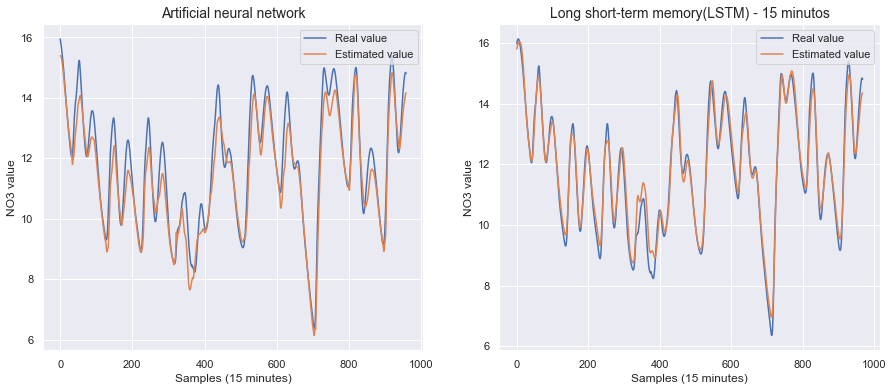

In [91]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM) - 15 minutos', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')

plt.show()

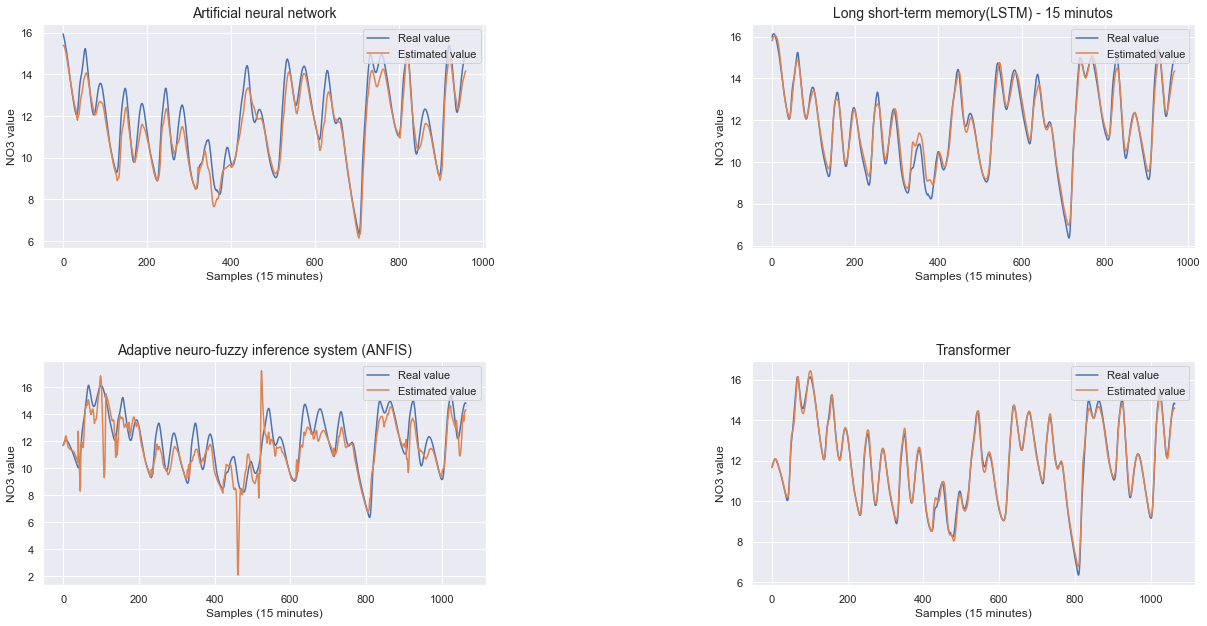

In [92]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')


plt.subplot(2, 2, 2)
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM) - 15 minutos', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')



plt.subplot(2, 2, 3)
plt.plot(df_anfis.NO_real)
plt.plot(df_anfis.NO_previsto)
plt.title('Adaptive neuro-fuzzy inference system (ANFIS)', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')



plt.subplot(2, 2, 4)
plt.plot(df_trans.real)
plt.plot(df_trans.previsto)
plt.title('Transformer', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')




plt.subplots_adjust(left=0.2,
                    bottom=0.12, 
                    right=1, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.5)

plt.show()

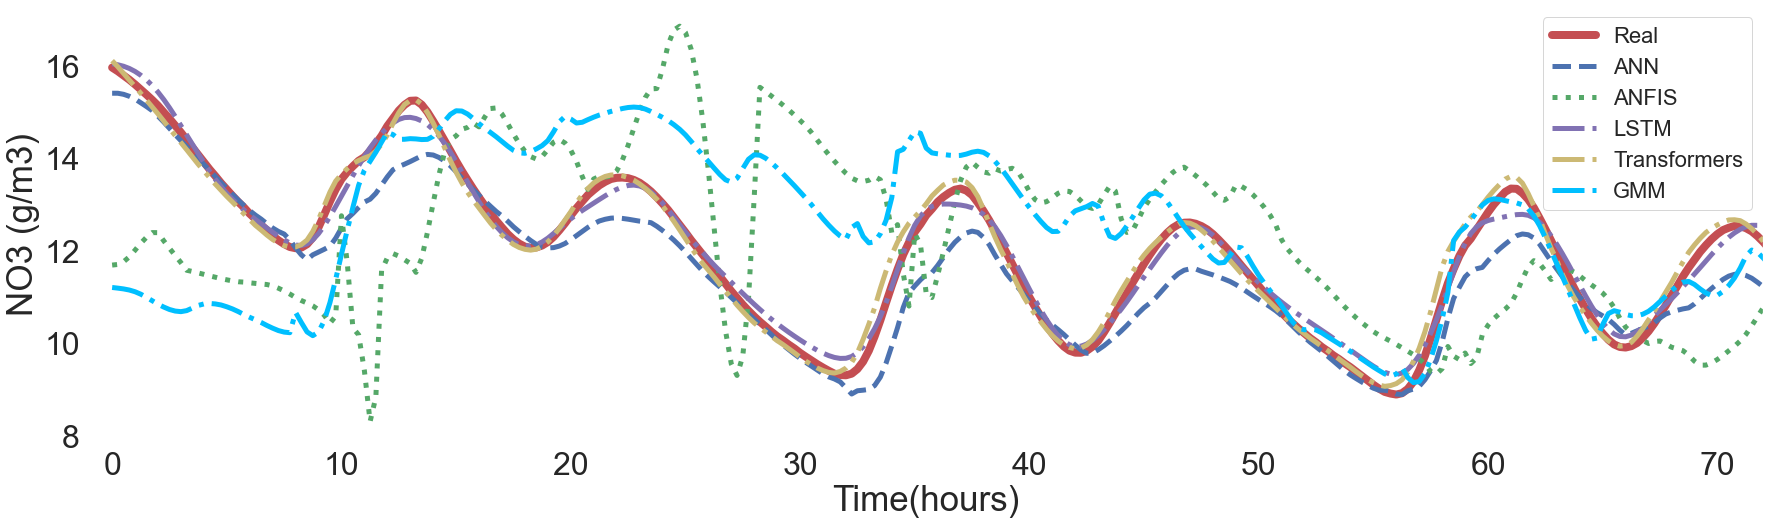

In [93]:
x_axis = np.arange(0,72.5,0.25) # Valores para o eixo x
plt.figure(figsize = (30, 8))
plt.plot(x_axis,df3.real.iloc[0:290],'r', linewidth=8)   
plt.plot(x_axis,df3.previsto.iloc[0:290], 'b', linestyle='--', linewidth=5) 
plt.plot(x_axis,df_anfis.NO_previsto.iloc[0:290], 'g', linestyle=':', linewidth=5) 
plt.plot(x_axis,previsto_LSTM[9:299],'m', linestyle='-.', linewidth=5) 

plt.plot(x_axis,df_trans.previsto[106:396],'y', linestyle='-.', linewidth=5)

plt.plot(x_axis,dfGRM.previsto.iloc[9:299],'deepskyblue', linestyle='-.', linewidth=5)


plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)
#plt.title('NO3 - forecast for the first day', fontsize=20)
plt.xlim([-1, 72])
plt.xlabel('Time(hours)', fontsize=35)
plt.ylabel('NO3 (g/m3)', fontsize=35)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

plt.rcParams['axes.facecolor'] = 'white'

plt.savefig('NO_junto1.pdf', dpi=800, format='pdf', bbox_inches='tight')
plt.show()

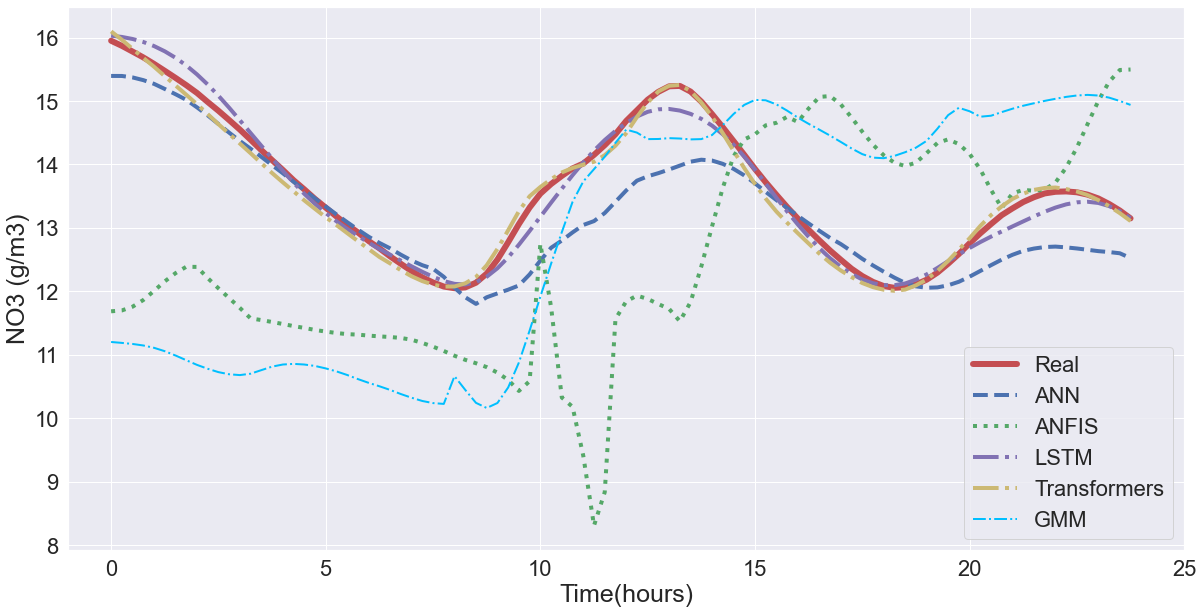

In [84]:
x_axis = np.arange(0,24,0.25) # Valores para o eixo x
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[0:96],'r', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[0:96], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.NO_previsto.iloc[0:96], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[9:105],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_trans.previsto[106:202],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[9:105],'deepskyblue', linestyle='-.', linewidth=2)


plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)
#plt.title('NO3 - forecast for the first day', fontsize=20)
plt.xlim([-1, 25])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('NO3 (g/m3)', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('NO1day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show()

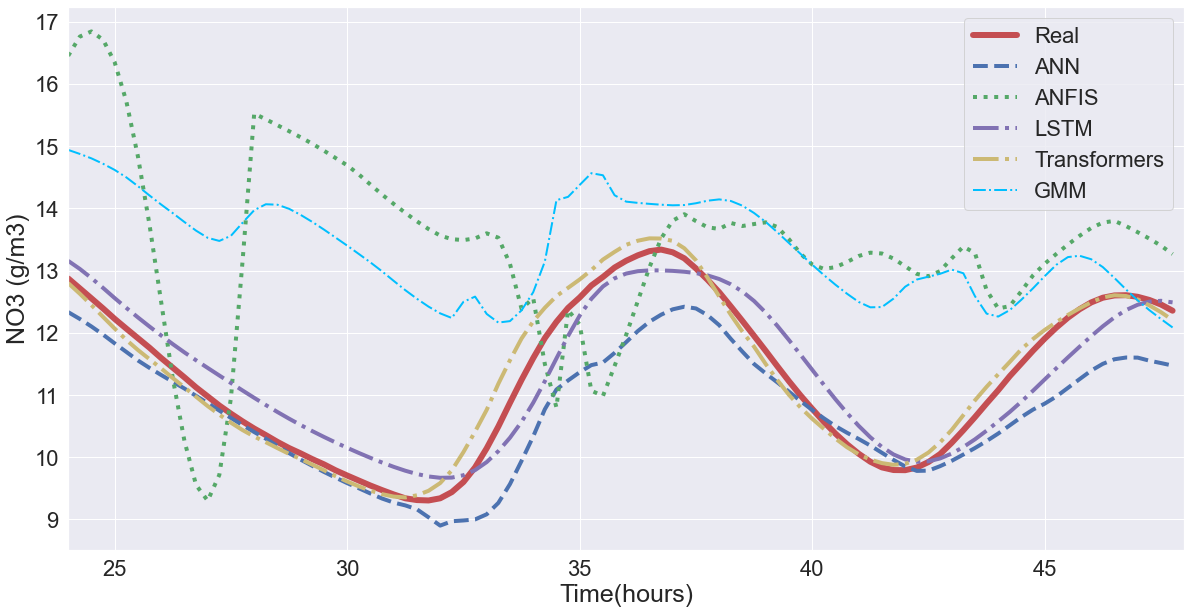

In [85]:
x_axis = np.arange(24,48,0.25) # Valores para o eixo x
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[97:193],'r', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[97:193], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.NO_previsto.iloc[97:193], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[104:200],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_trans.previsto[203:299],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[104:200],'deepskyblue', linestyle='-.', linewidth=2)


plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)
#plt.title('NO3 - forecast for the second day', fontsize=20)
plt.xlim([24, 48])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('NO3 (g/m3)', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('NO2day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show() 

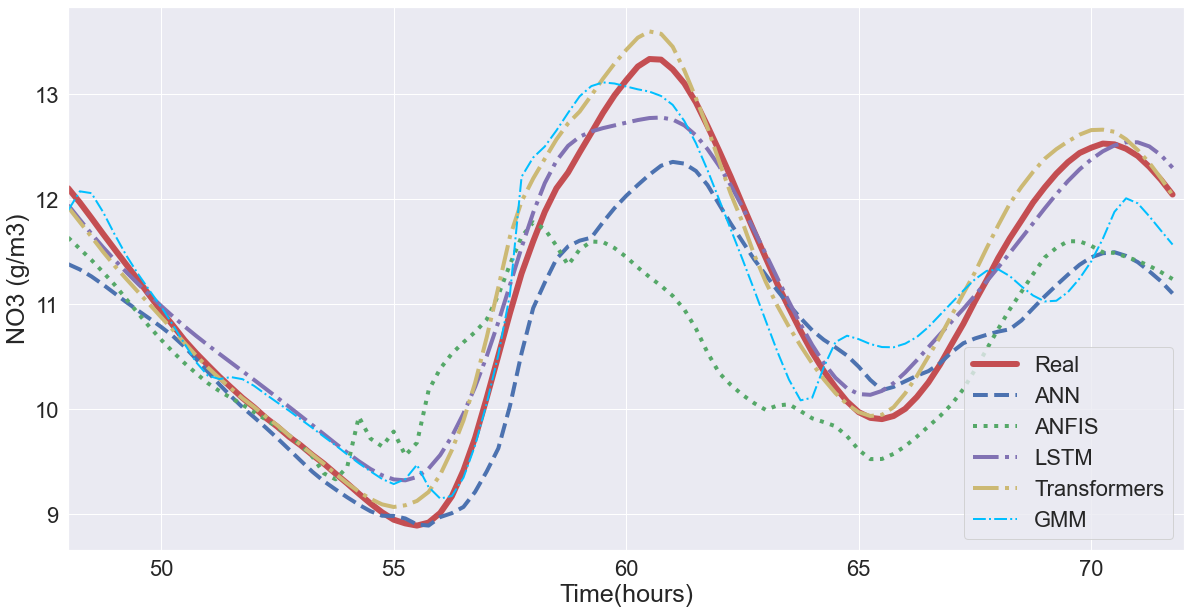

In [86]:
x_axis = np.arange(48,72,0.25) # Valores para o eixo x
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[194:290],'r', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[194:290], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.NO_previsto.iloc[208:304], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[204:300],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_trans.previsto[300:396],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[204:300],'deepskyblue', linestyle='-.', linewidth=2)

plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)
#plt.title('NO3 - forecast for the third day', fontsize=20)
plt.xlim([48, 72])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('NO3 (g/m3)', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('NO3day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show()